In [10]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import re



- Exploratory Data Analysis:
    - Understanding the Data.
    - Summerizing
    - Gaining insights
    - Visualizing
    - check for issues
    - forming hypothesis.  


#Data Cleaning.
    Goals:
           - Removed extra columns.
           - handled missing Values
           - Cleaned "Price"
           - cleaned "Cngkit"
           - Cleaned "TransmissionType"

Understanding The Data.
```
- Column Name -   	Description
- ID	Unique -       ID for each listing
- Company	-         Name of the car manufacturer
- Model -	          Name of the car model
- Variant -	        Name of the car variant
- Fuel Type	-       Fuel type of the car
- Color -         	 Color of the car
- Kilometer -     	 Number of kilometers driven by the car
- Body Style -	     Body style of the car
- TransmissionType-    Transmission type of the car
- ManufactureDate-     Manufacture date of the car
- ModelYear  -	     Model year of the car
- CngKit -             Whether the car has a CNG kit or not
- Price	-           Price of the car
- OwnerType -	      Number of previous owners of the car
- DealerState -        State in which the car is being sold
- DealerName - 	    Name of the dealer selling the car
- City -               City in which the car is being sold
- Warranty -	       Warranty offered by the dealer
- QualityScore -	   Quality score of the car
```






In [2]:
#Visualize The Data.
df = pd.read_csv('/content/usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,01-02-2018,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,01-03-2021,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,01-03-2015,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,01-08-2020,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,01-11-2010,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [3]:
df.shape
#  19 attributes is a lot lets Drop some useless ones .

(1064, 19)

In [4]:
print(list(df.columns))

['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear', 'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City', 'Warranty', 'QualityScore']


1. Dropping Uneccesary Data columns:
    - id
    - DealerName
    - DealerState
    - ManufatureDate

In [5]:
df = df.drop(columns=["Id"]) # Drop 1 Column
df.columns

Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [6]:
print(df.shape)         # Shows (rows, columns)
print(df.info())
print("MISSING DATA TABLE")
print(df.isnull().sum())        # Shows data types, non-null counts
# 18 columns left with some of them having NUll Values
# Price  1064 non-null   object  # error


(1064, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1064 non-null   object 
 1   Model             1064 non-null   object 
 2   Variant           1064 non-null   object 
 3   FuelType          1064 non-null   object 
 4   Colour            1064 non-null   object 
 5   Kilometer         1064 non-null   int64  
 6   BodyStyle         1064 non-null   object 
 7   TransmissionType  350 non-null    object 
 8   ManufactureDate   1064 non-null   object 
 9   ModelYear         1064 non-null   int64  
 10  CngKit            22 non-null     object 
 11  Price             1064 non-null   object 
 12  Owner             1064 non-null   object 
 13  DealerState       1064 non-null   object 
 14  DealerName        1064 non-null   object 
 15  City              1064 non-null   object 
 16  Warranty          1064 non-null

In [7]:
print(df['Price'].unique()[:20])  # peek first 20 unique values

['5.75 Lakhs' '4.35 Lakhs' '4.7 Lakhs' '9.9 Lakhs' '2.7 Lakhs'
 '9.99 Lakhs' '6.75 Lakhs' '6 Lakhs' '4.8 Lakhs' '2.4 Lakhs' '6.5 Lakhs'
 '5 Lakhs' '11.35 Lakhs' '8.75 Lakhs' '13.5 Lakhs' '5.95 Lakhs'
 '7.55 Lakhs' '4.1 Lakhs' '5.25 Lakhs' '4.85 Lakhs']


In [8]:
def convert_price(val):
    if pd.isnull(val):
        return None
    val = str(val).lower().replace(",", "").strip()

    # Remove extra quotes or garbage
    val = val.replace("'", "").replace('"', '').strip()

    # Lakhs
    if 'lakhs' in val:
        num = re.findall(r"[\d.]+", val)
        if num:
            return int(float(num[0]) * 100000)
    # Plain numbers
    if val.isdigit():
        return int(val)

    return None


In [11]:
df['Price'] = df['Price'].apply(convert_price)
print(df['Price'])
print("changed data type of price")
df['FuelType'] = df['FuelType'].fillna('PETROL')
print("count : ",len(df['FuelType'].unique()))

0       575000
1       434999
2       470000
3       990000
4       270000
         ...  
1059    715000
1060    500000
1061    575000
1062    771000
1063    499000
Name: Price, Length: 1064, dtype: int64
changed data type of price
count :  5


In [12]:
df['CngKit'].unique()[:1064]

array([nan, 'Company Fitted', 'After Market'], dtype=object)

In [13]:
# fill blanks and normalize case
df['CngKit'] = df['CngKit'].fillna('NA').replace('', 'NA').str.strip().str.lower()

# Map known categories to binary
df['CngKit'] = df['CngKit'].map({
    'company fitted': 1,
    'after market': 1,
    'na': 0
})

#Final safety fill
df['CngKit'] = df['CngKit'].fillna(0).astype(int)

# Check result
print(df['CngKit'].value_counts())



CngKit
0    1042
1      22
Name: count, dtype: int64


In [14]:
print(df['CngKit'].unique())
print(df['CngKit'].dtype)

[0 1]
int64


In [15]:
# Normalize case and strip
df['TransmissionType'] = df['TransmissionType'].str.strip().str.lower()

# Map known variations and typos
trans_map = {
    'manual': 'manual',
    'm': 'manual',
    'automatic': 'automatic',
    'a': 'automatic',
    'cvt': 'automatic',         # CVT is a type of automatic
    'auotmatic': 'automatic',   # typo
}

df['TransmissionType'] = df['TransmissionType'].map(trans_map)

# Impute missing values using most common transmission per model
model_trans_map = df.dropna(subset=['TransmissionType']).groupby('Model')['TransmissionType'].agg(lambda x: x.mode()[0])

df['TransmissionType'] = df.apply(
    lambda row: model_trans_map[row['Model']] if pd.isnull(row['TransmissionType']) and row['Model'] in model_trans_map else row['TransmissionType'],
    axis=1
)

#  Fallback to 'manual' if still missing
df['TransmissionType'] = df['TransmissionType'].fillna('manual')

#  Final check
print(df['TransmissionType'].value_counts())


TransmissionType
manual       941
automatic    123
Name: count, dtype: int64


In [16]:
df['MileagePerYear'] = df['Kilometer'] / (df['ModelYear'].replace(0, 0.1))

In [17]:
print("MISSING DATA TABLE")
print(df.isnull().sum())

MISSING DATA TABLE
Company             0
Model               0
Variant             0
FuelType            0
Colour              0
Kilometer           0
BodyStyle           0
TransmissionType    0
ManufactureDate     0
ModelYear           0
CngKit              0
Price               0
Owner               0
DealerState         0
DealerName          0
City                0
Warranty            0
QualityScore        0
MileagePerYear      0
dtype: int64


Data Cleaning at TransmissionType column.

# Exploratory Data Analysis
   Goals:
    
      - Spot Trends — e.g., Does price go down with more kilometers?

      - Test Hypotheses — e.g., Do automatic cars cost more?

      - Validate Data — Catch outliers or incorrect values

      - Feature Importance — Identify strong predictors for modeling

| Hypothesis No. | Hypothesis Statement                                       |
| -------------- | ---------------------------------------------------------- |
| H1             | Newer cars (higher `ModelYear`) have higher prices         |
| H2             | Cars with automatic transmission cost more                 |
| H3             | CNG-fitted cars are cheaper or costlier depending on model |
| H4             | More kilometers driven → lower price                       |
| H5             | QualityScore correlates positively with price              |
| H6             | Some brands (`Company`) have consistently higher prices    |
| H7  | Fuel type significantly affects resale price                  |
| H8  | Dealer's state influences car price                           |
| H9  | Higher mileage per year indicates more wear and reduces price |
| H10 | Luxury brands maintain higher prices even with age or usage   |



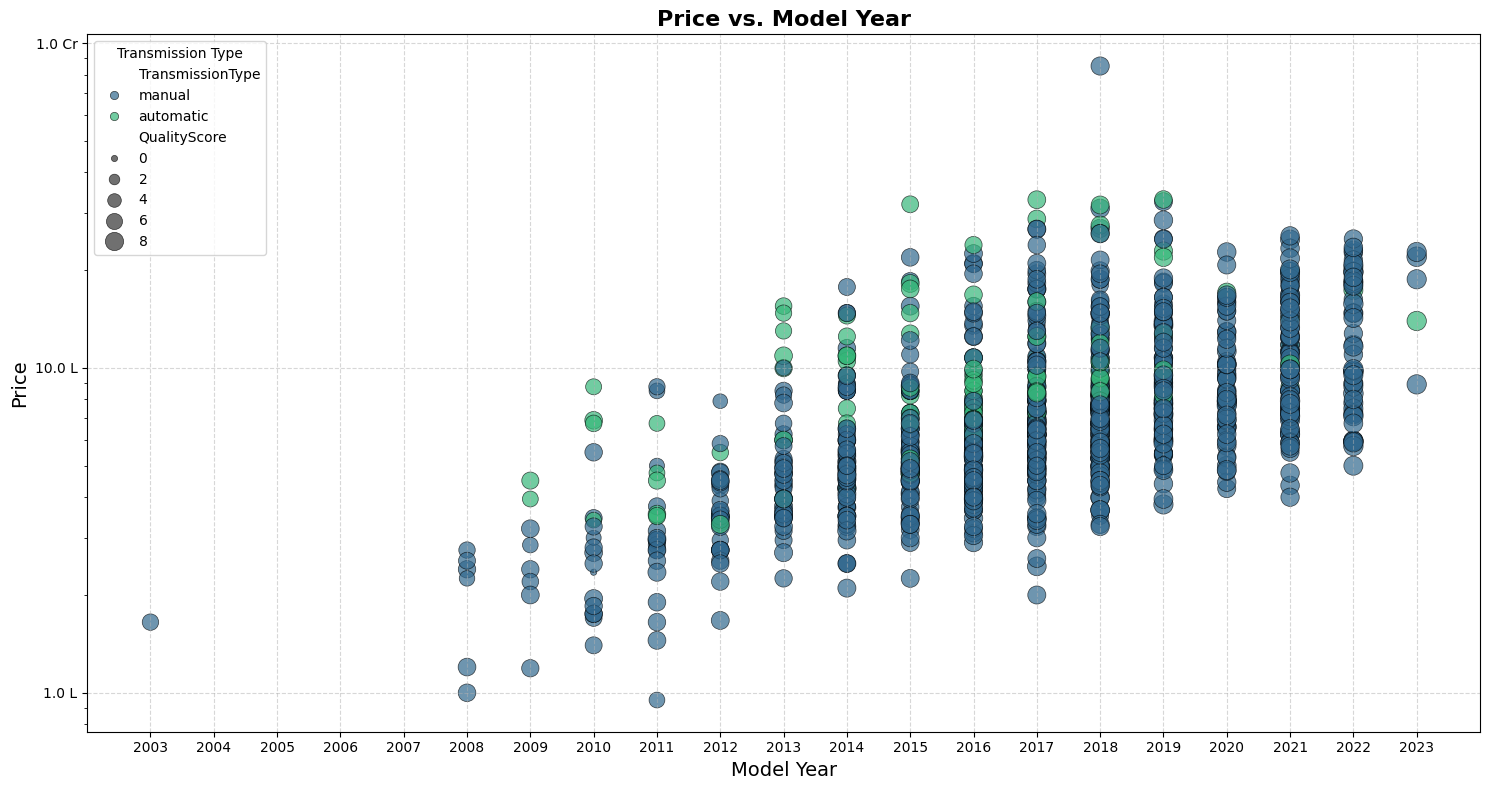

In [18]:
# Convert ModelYear to integer if it's not already
df['ModelYear'] = df['ModelYear'].astype(int)

# Custom function to format y-axis ticks
def format_price_ticks(value, pos):
    if value >= 10000000:
        return f'{value / 10000000:.1f} Cr'
    elif value >= 100000:
        return f'{value / 100000:.1f} L'
    else:
        return f'{int(value):,}'

plt.figure(figsize=(15, 8))

sns.scatterplot(data=df, # Use the full dataframe
                x='ModelYear',
                y='Price',
                hue='TransmissionType',
                palette="viridis",
                size="QualityScore",
                sizes=(20, 200),
                alpha=0.7,
                linewidth=0.5,
                edgecolor="black"
                )

plt.title('Price vs. Model Year', fontsize=16, fontweight='bold')
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.xticks(range(int(min(df['ModelYear'])), int(max(df['ModelYear'])) + 1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title='Transmission Type', fontsize=10)
plt.tight_layout()
plt.show()

H2 - Cars with automatic transmission cost more?.

<ipython-input-19-15125a1928e4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
<ipython-input-19-15125a1928e4>:25: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


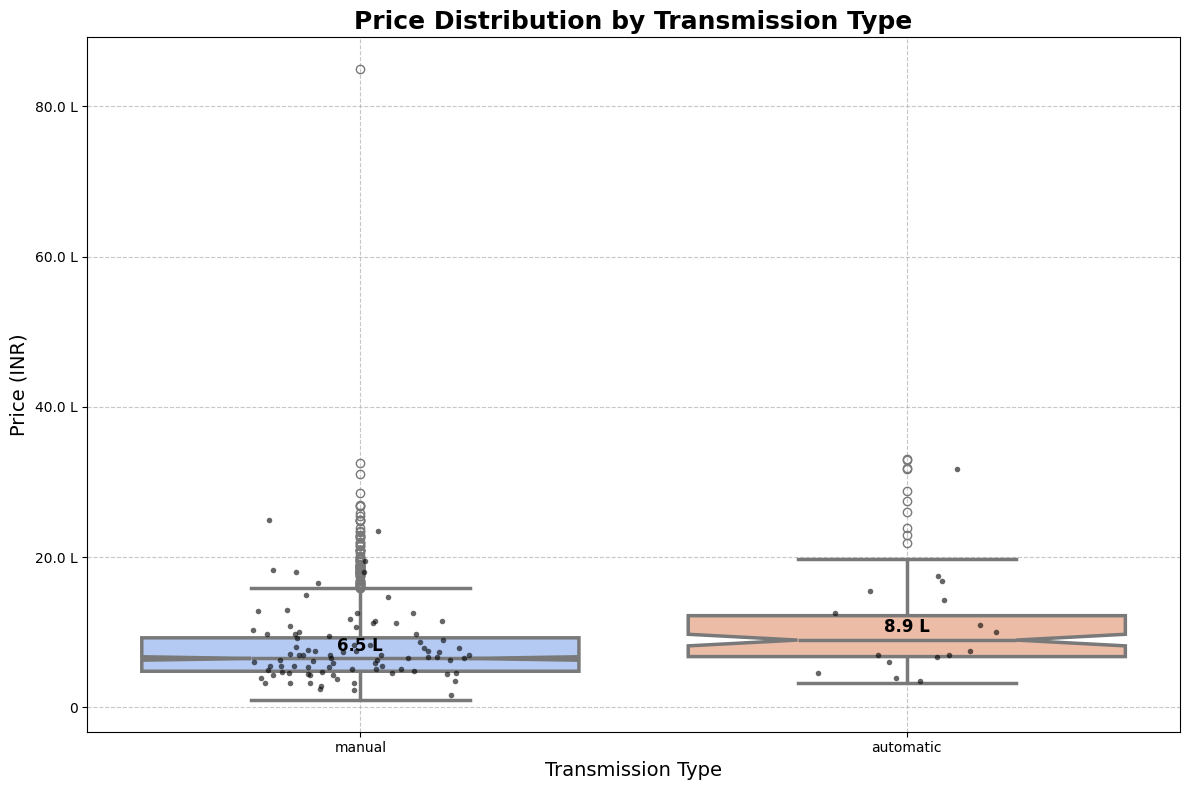

In [19]:
# Function to format price ticks (Lakhs/Cr)
def format_price_ticks(value, pos):
    if value >= 10000000:
        return f'{value / 10000000:.1f} Cr'
    elif value >= 100000:
        return f'{value / 100000:.1f} L'
    else:
        return f'{int(value):,}'

# Create the figure and axes
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=df,
    x='TransmissionType',
    y='Price',
    palette='coolwarm',
    linewidth=2.5,
    notch=True
)

# Downsample data for strip plot
strip_plot_data = df.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Add stripplot with downsampled data
sns.stripplot(
    data=strip_plot_data,  # Use downsampled data here
    x='TransmissionType',
    y='Price',
    color='black',
    edgecolor='gray',
    size=4,
    jitter=0.2,
    alpha=0.6
)

# Customize plot elements
ax.set_title('Price Distribution by Transmission Type', fontsize=18, fontweight='bold')
ax.set_xlabel('Transmission Type', fontsize=14)
ax.set_ylabel('Price (INR)', fontsize=14)

# Format y-axis ticks
ax.yaxis.set_major_formatter(FuncFormatter(format_price_ticks))

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Add annotations for median price
medians = df.groupby('TransmissionType')['Price'].median()
for group, median in medians.items():
    ax.text(
        x=group,
        y=median + 50000,
        s=f'{format_price_ticks(median, 0)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

H3-Do CNG-fitted cars (Company Fitted / After Market) tend to be cheaper or costlier — depending on the model?

<ipython-input-20-506d57f053e8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cng_df['Model'] = cng_df['Model'].astype(str)


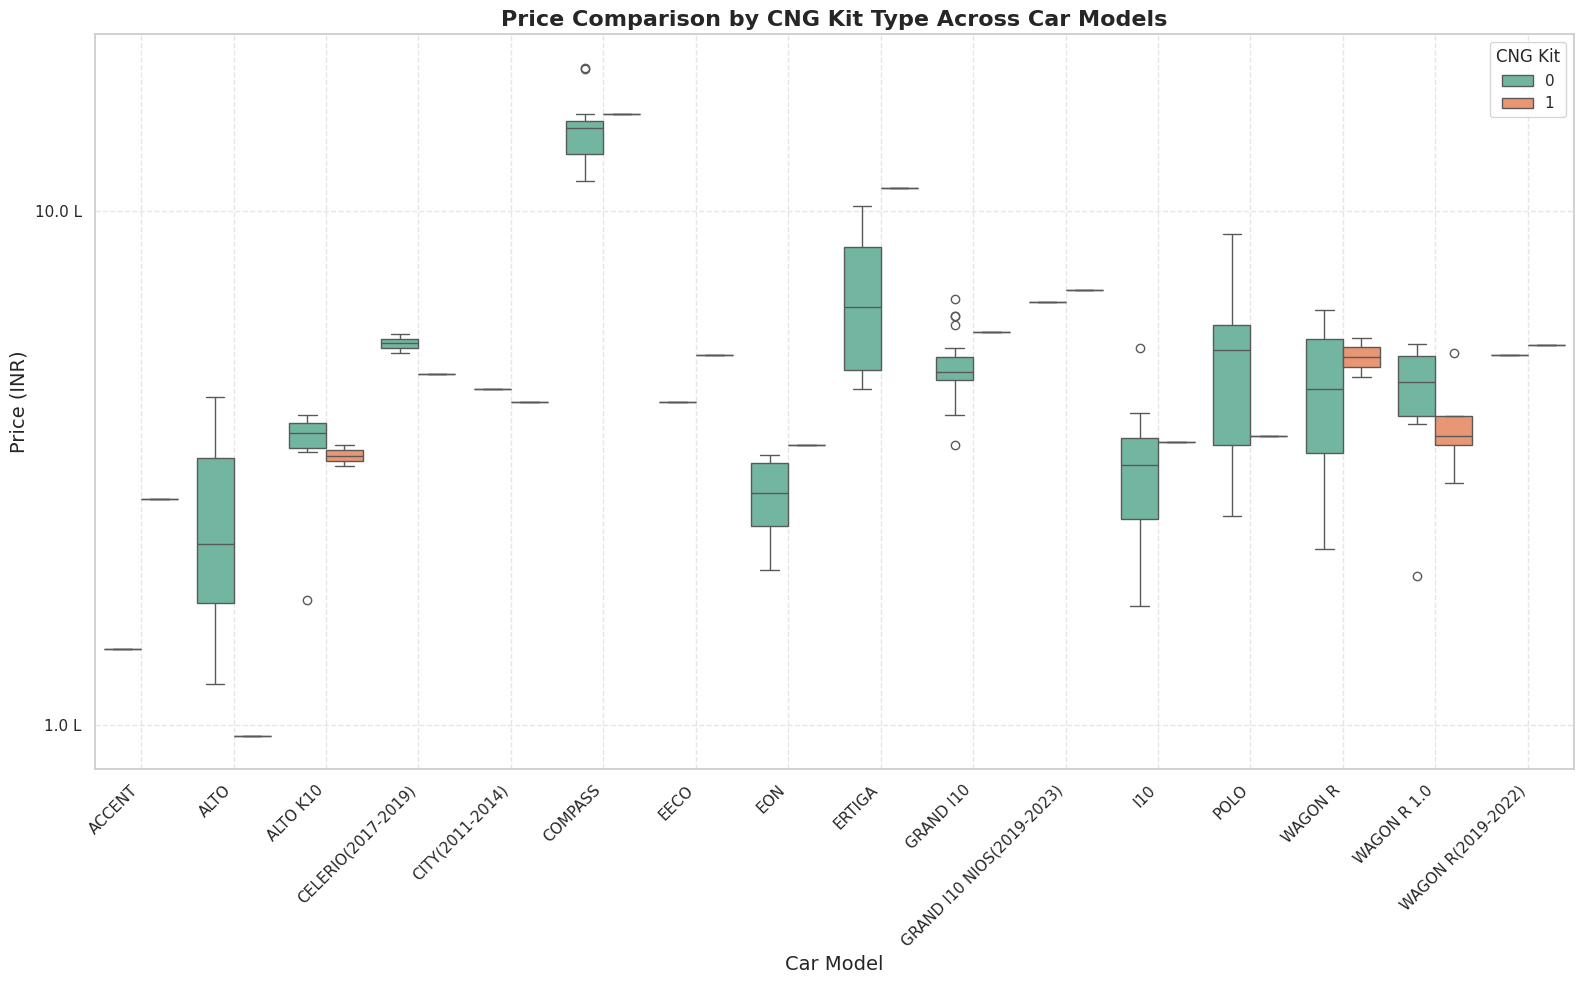

In [20]:
# Filter models where we have both CNG and non-CNG versions
valid_models = df.groupby('Model')['CngKit'].nunique()
valid_models = valid_models[valid_models > 1].index.tolist()

# Filter data
cng_df = df[df['Model'].isin(valid_models) & df['CngKit'].notna()]
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Sort models alphabetically for clarity
cng_df['Model'] = cng_df['Model'].astype(str)
cng_df = cng_df.sort_values('Model')

sns.boxplot(
    data=cng_df,
    x='Model',
    y='Price',
    hue='CngKit',
    palette='Set2'
)

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.title('Price Comparison by CNG Kit Type Across Car Models', fontsize=16, fontweight='bold')
plt.xlabel('Car Model', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='CNG Kit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


H4 - More kilometers driven → lower price

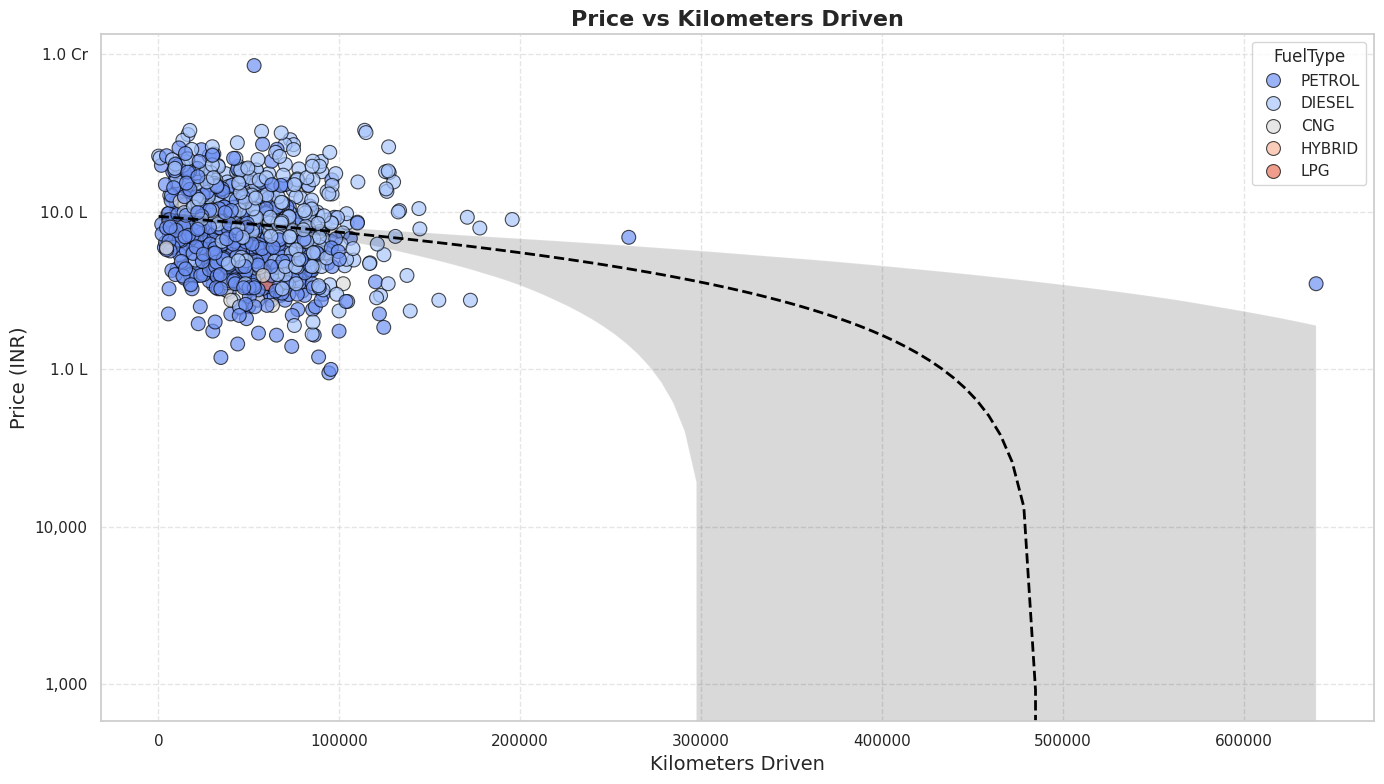

In [21]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=df,
    x='Kilometer',
    y='Price',
    hue='FuelType',
    palette='coolwarm',
    alpha=0.7,
    edgecolor='black',
    s=100
)

# Optional regression line to show trend
sns.regplot(
    data=df,
    x='Kilometer',
    y='Price',
    scatter=False,
    color='black',
    line_kws={"linestyle": "--", "linewidth": 2}
)

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.title('Price vs Kilometers Driven', fontsize=16, fontweight='bold')
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


H5-Cars with higher quality scores tend to be priced higher.

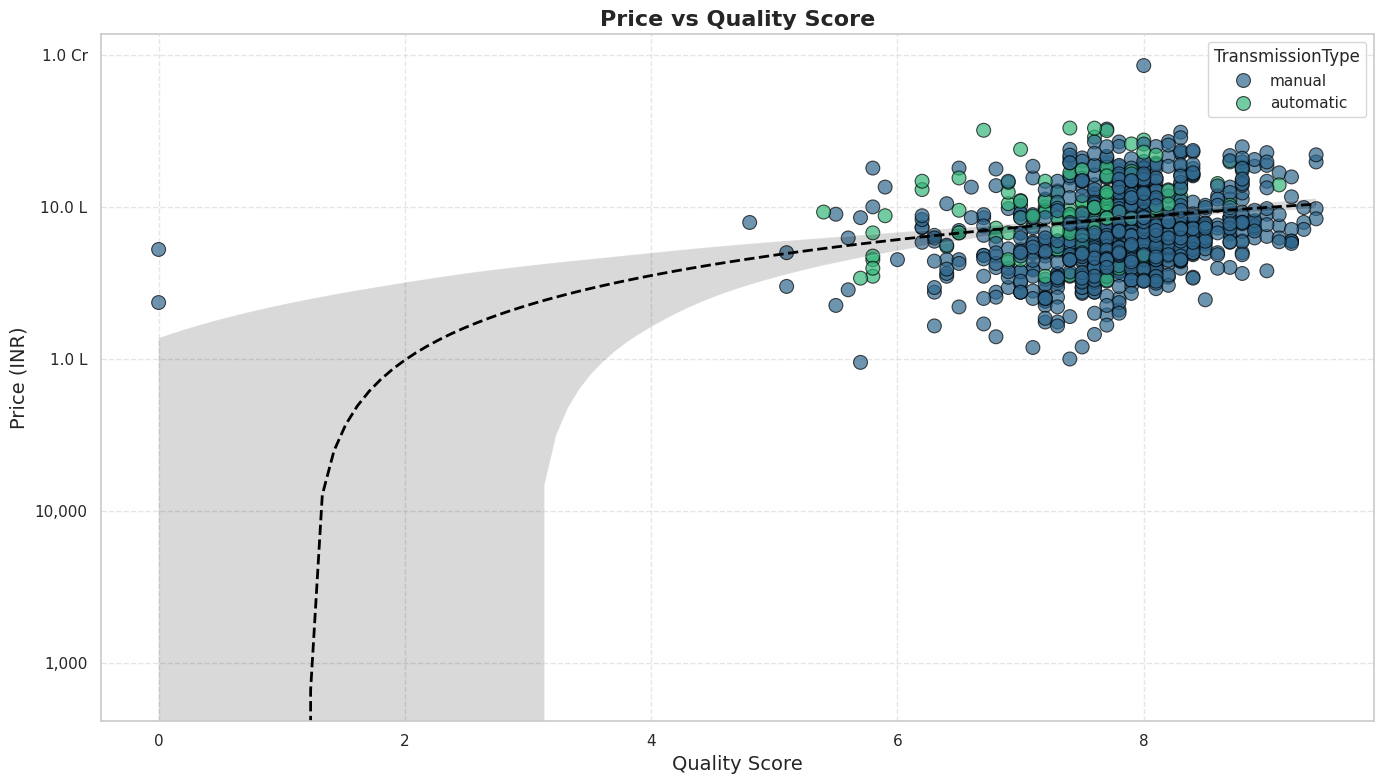

In [22]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=df,
    x='QualityScore',
    y='Price',
    hue='TransmissionType',
    palette='viridis',
    alpha=0.7,
    edgecolor='black',
    s=100  # fixed size, cleaner
)

# Optional: regression line
sns.regplot(
    data=df,
    x='QualityScore',
    y='Price',
    scatter=False,
    color='black',
    line_kws={"linestyle": "--", "linewidth": 2}
)

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.title('Price vs Quality Score', fontsize=16, fontweight='bold')
plt.xlabel('Quality Score', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


h5- Some brands (Company) have consistently higher prices

<ipython-input-23-76944a6ab158>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='Company', y='Price', palette='viridis')


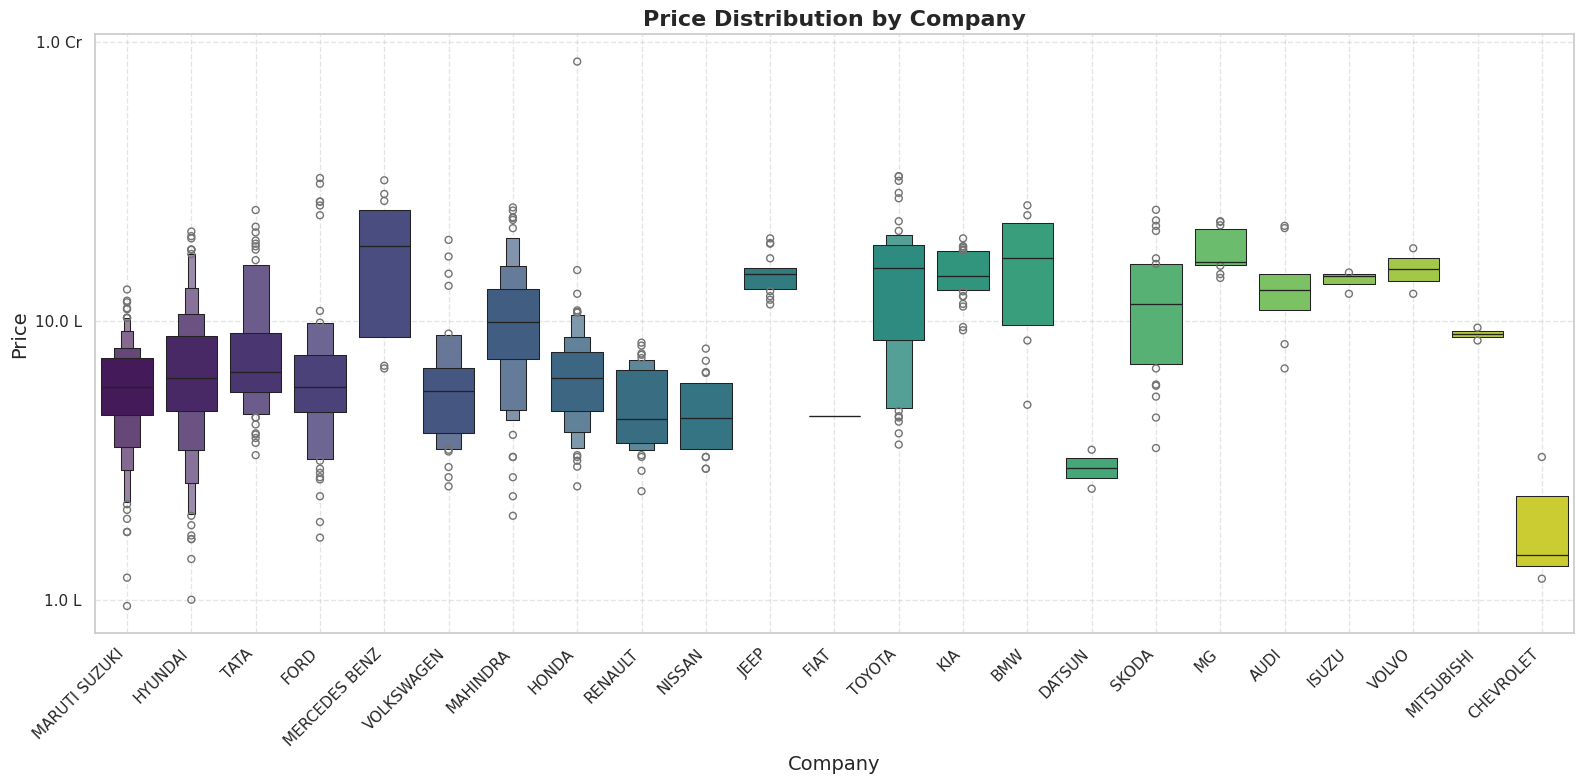

In [23]:
# h5- Some brands (Company) have consistently higher prices
plt.figure(figsize=(16, 8))
sns.boxenplot(data=df, x='Company', y='Price', palette='viridis')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.title('Price Distribution by Company', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


H7	Fuel type significantly affects resale price

<ipython-input-24-16560b9450f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FuelType', y='Price', data=df, palette='Set3')


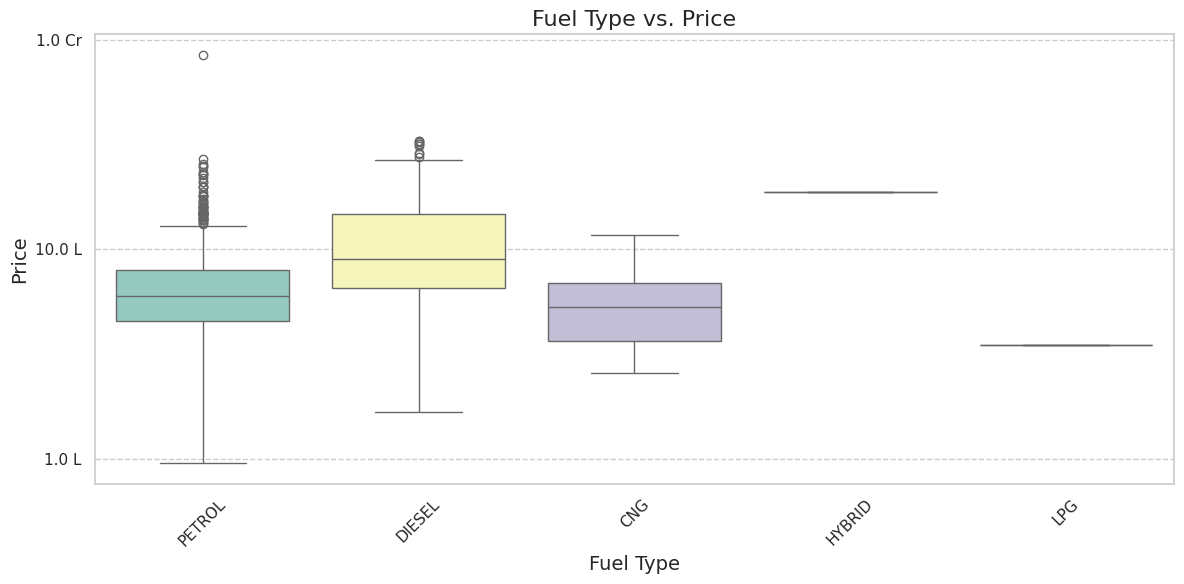

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FuelType', y='Price', data=df, palette='Set3')
plt.title('Fuel Type vs. Price', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


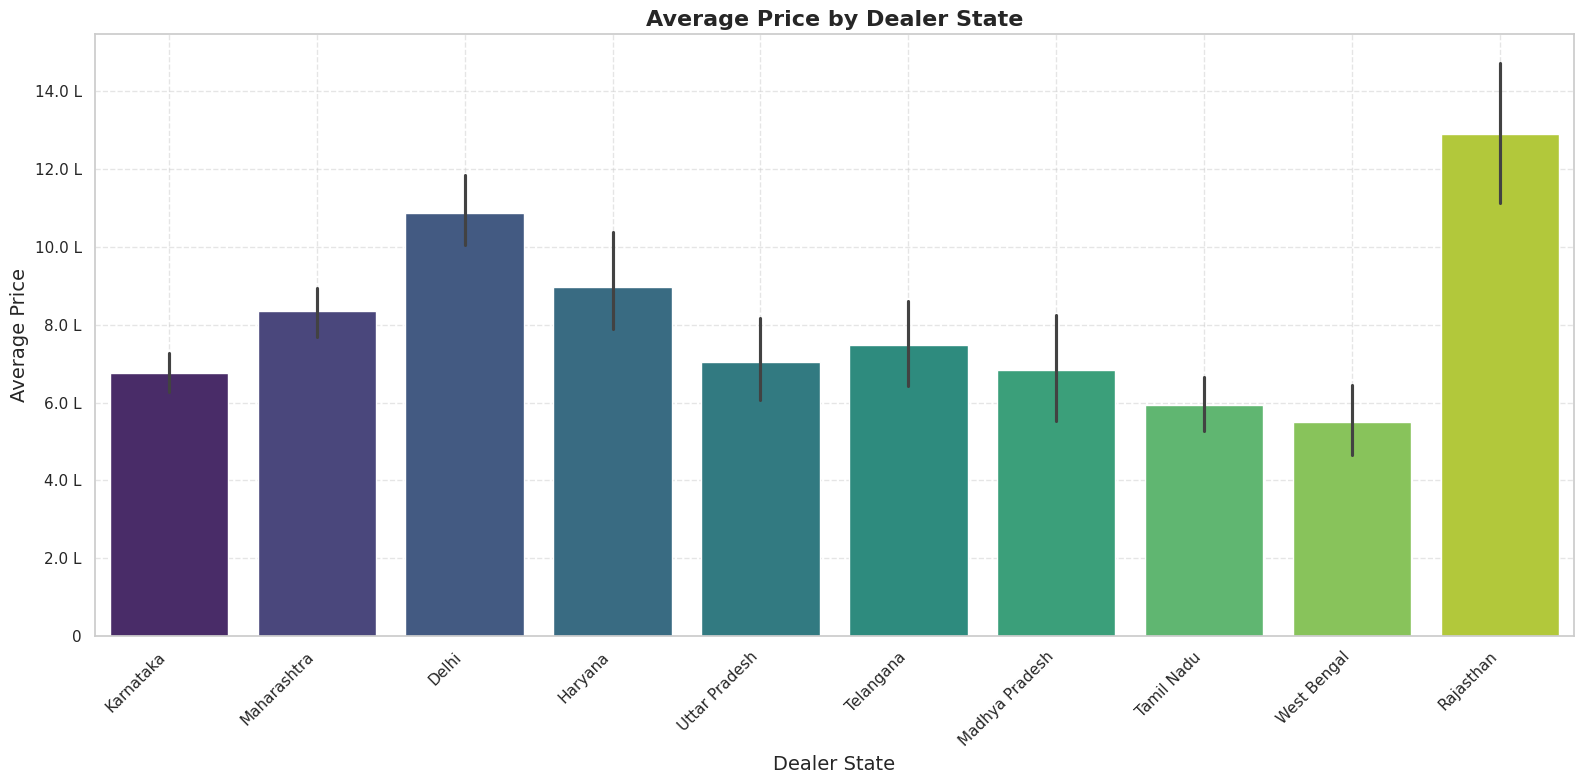

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
def format_price_ticks(value, pos):
    if value >= 10000000:
        return f'{value / 10000000:.1f} Cr'
    elif value >= 100000:
        return f'{value / 100000:.1f} L'
    else:
        return f'{int(value):,}'


plt.figure(figsize=(16, 8))


ax = sns.barplot(data=df, x='DealerState', y='Price', estimator=np.mean, hue='DealerState', palette='viridis', legend=False)

ax.yaxis.set_major_formatter(FuncFormatter(format_price_ticks))


plt.title('Average Price by Dealer State', fontsize=16, fontweight='bold')
plt.xlabel('Dealer State', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

# Add gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

Mileage Per Year vs Price

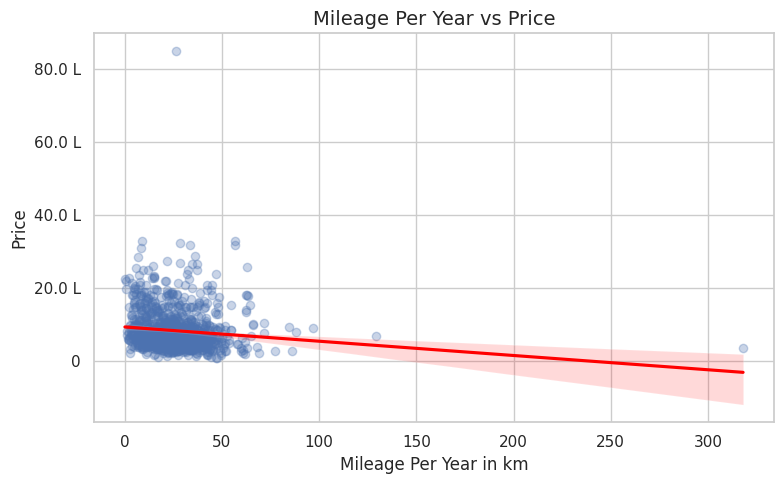

In [26]:

def format_price_ticks(value, pos):
    if value >= 10000000:
        return f'{value / 10000000:.1f} Cr'  # In Crores (10 million)
    elif value >= 100000:
        return f'{value / 100000:.1f} L'  # In Lakhs (100k)
    else:
        return f'{int(value):,}'  # Smaller values formatted with commas

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='MileagePerYear', y='Price', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Mileage Per Year vs Price', fontsize=14)
plt.xlabel('Mileage Per Year in km')
plt.ylabel('Price')

# Apply the custom formatter to the y-axis to display Lakhs/Cr
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))

plt.tight_layout()
plt.show()

Luxury vs Non-Luxury Price Comparison


<ipython-input-27-fc96ad88bd79>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Luxury', y='Price', palette='Set2')


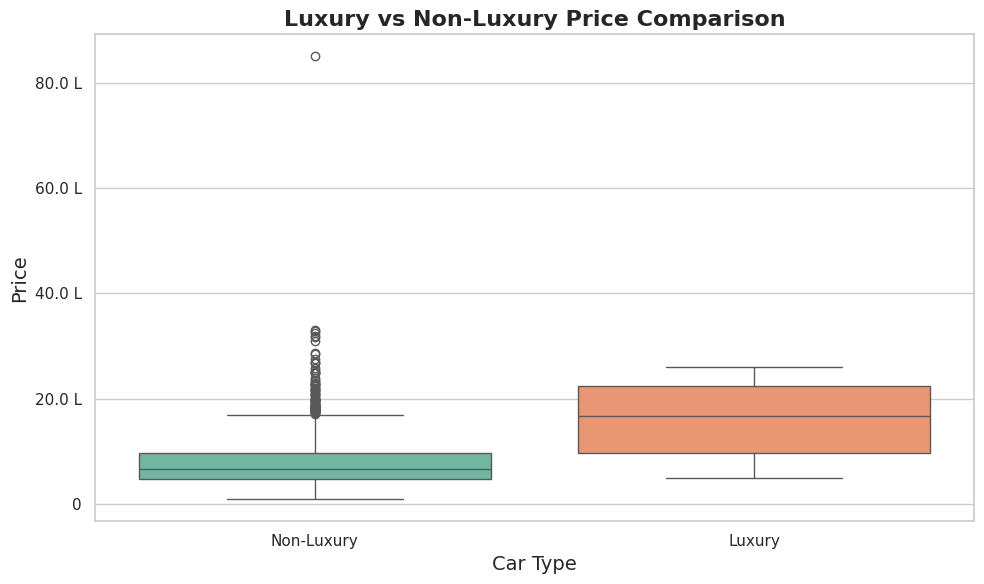

In [27]:
# Define luxury car companies
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Jaguar', 'Land Rover', 'Porsche', 'Lexus', 'Volvo']  # Add more if needed

# Create a new column to classify cars as luxury or non-luxury
df['Luxury'] = df['Company'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Non-Luxury')

# Function to format price ticks (Lakhs/Cr)
def format_price_ticks(value, pos):
    if value >= 10000000:
        return f'{value / 10000000:.1f} Cr'
    elif value >= 100000:
        return f'{value / 100000:.1f} L'
    else:
        return f'{int(value):,}'


plt.figure(figsize=(10, 6))


sns.boxplot(data=df, x='Luxury', y='Price', palette='Set2')


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))


plt.title('Luxury vs Non-Luxury Price Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Car Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.tight_layout()

plt.show()

In [28]:
df.head(5)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore,MileagePerYear,Luxury
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,manual,01-02-2018,2018,0,575000,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8,16.450446,Non-Luxury
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,manual,01-03-2021,2021,0,434999,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3,5.107373,Non-Luxury
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,manual,01-03-2015,2015,0,470000,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9,18.803474,Non-Luxury
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,manual,01-08-2020,2020,0,990000,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1,6.488119,Non-Luxury
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,manual,01-11-2010,2010,0,270000,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5,52.046766,Non-Luxury


# Model Building:
        Goals:
          - Feature Engineering.
          - Selecte Features and Target
          - one hot encoding
          - Data scaling
          - Split Data
          - model Selection and Evaluation
          - training Model.
          - predictiions
          - Evaluate Performance
          - Feature Importance
          - Plotting.

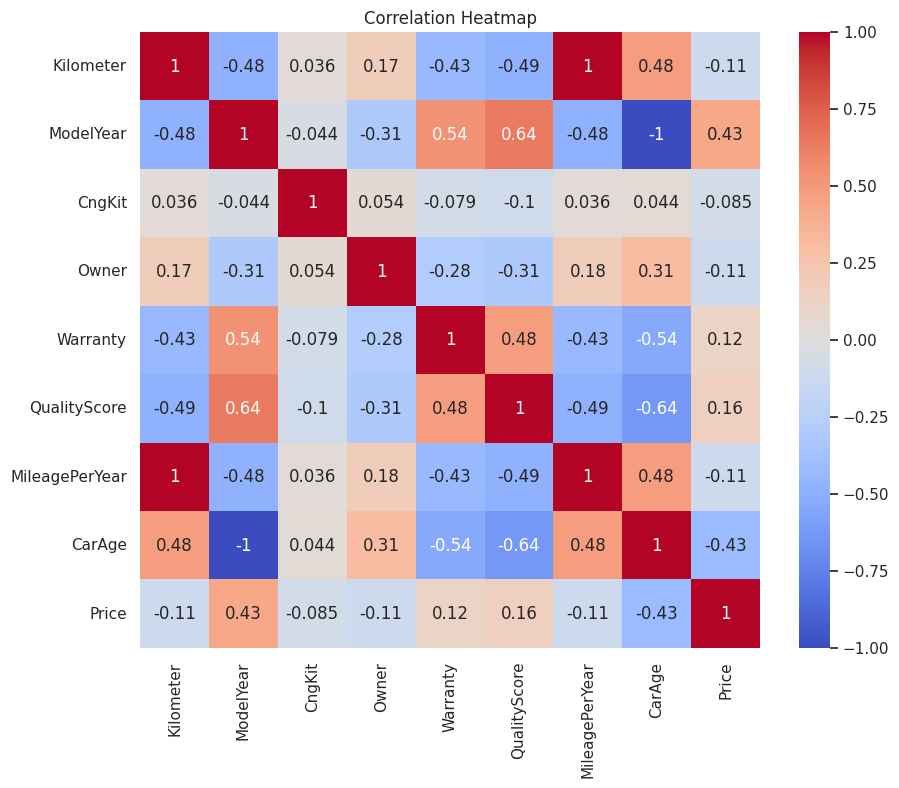

Feature correlations with Price (sorted):
ModelYear         0.428888
CarAge           -0.428888
QualityScore      0.160448
Warranty          0.121333
MileagePerYear   -0.114833
Kilometer        -0.114085
Owner            -0.110405
CngKit           -0.085044
Name: Price, dtype: float64


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['Owner'] = df['Owner'].str.extract('(\d+)').astype(float)
df['CngKit'] = df['CngKit'].astype(int)
df['Warranty'] = df['Warranty'].astype(int, errors='ignore')
df['CarAge'] = 2025 - df['ModelYear']
num_cols = ['Kilometer', 'ModelYear', 'CngKit', 'Owner', 'Warranty',
            'QualityScore', 'MileagePerYear', 'CarAge', 'Price']
df_numeric = df[num_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
correlations = df_numeric.corr()['Price'].drop('Price')
sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)
print("Feature correlations with Price (sorted):")
print(sorted_corr)


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from math import sqrt

df= df.drop(['DealerName', 'Variant', 'ManufactureDate'], axis=1, errors='ignore')


y = df['Price']
X = df.drop('Price', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
categorical_cols = ['Company', 'Model', 'FuelType', 'Colour', 'BodyStyle',
                    'TransmissionType', 'Owner', 'DealerState', 'City', 'Warranty', 'Luxury']
numerical_cols = ['Kilometer', 'ModelYear', 'QualityScore', 'MileagePerYear', 'CngKit']

# Preprocessing
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Define Optuna objective
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, **params))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)

# Train final model with best params
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, **study.best_params))
])

final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)

# Evaluation
rmse = sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"✅ Final RMSE: {rmse:.2f}")
print(f"✅ Final R² Score: {r2:.4f}")


[I 2025-05-12 12:08:46,440] A new study created in memory with name: no-name-e5a61987-7f8f-491e-ae92-fa398be86de4
[I 2025-05-12 12:08:47,948] Trial 0 finished with value: 62595702784.0 and parameters: {'n_estimators': 485, 'max_depth': 12, 'learning_rate': 0.18181649223397897, 'subsample': 0.747725093081914, 'colsample_bytree': 0.7269851548263873, 'reg_alpha': 0.8146402630309169, 'reg_lambda': 0.0017156277818467514}. Best is trial 0 with value: 62595702784.0.
[I 2025-05-12 12:08:49,035] Trial 1 finished with value: 47129669632.0 and parameters: {'n_estimators': 504, 'max_depth': 9, 'learning_rate': 0.0476622123849236, 'subsample': 0.9989563507346295, 'colsample_bytree': 0.9913372015882549, 'reg_alpha': 0.4651095419434641, 'reg_lambda': 0.562692977995618}. Best is trial 1 with value: 47129669632.0.
[I 2025-05-12 12:08:50,098] Trial 2 finished with value: 40368545792.0 and parameters: {'n_estimators': 695, 'max_depth': 7, 'learning_rate': 0.08615709661874116, 'subsample': 0.7523093984940

Best params: {'n_estimators': 782, 'max_depth': 6, 'learning_rate': 0.26614299040610867, 'subsample': 0.9483583383618638, 'colsample_bytree': 0.9373022303235162, 'reg_alpha': 0.7900106435590543, 'reg_lambda': 0.9363232828451331}
✅ Final RMSE: 196512.39
✅ Final R² Score: 0.8386


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Use the best params from Optuna
best_params = {'n_estimators': 586, 'max_depth': 12, 'learning_rate': 0.12651568621056333, 'subsample': 0.8962688684966099, 'colsample_bytree': 0.6071842218250192, 'gamma': 0.44570463343038774, 'min_child_weight': 1}

final_model = Pipeline([
    ('preprocess', preprocessor),  # reuse the same preprocessor as before
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42, **best_params))
])

final_model.fit(X_train, y_train)

# Predict and evaluate
preds = final_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"✅ Final RMSE: {rmse:.2f}")
print(f"✅ Final R² Score: {r2:.4f}")


✅ Final RMSE: 264087.55
✅ Final R² Score: 0.7085


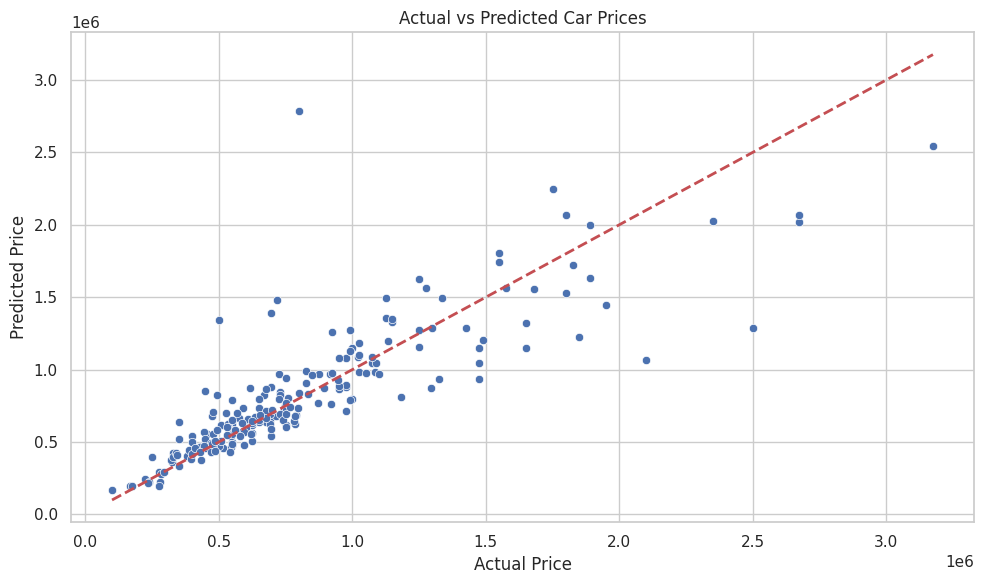

In [51]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


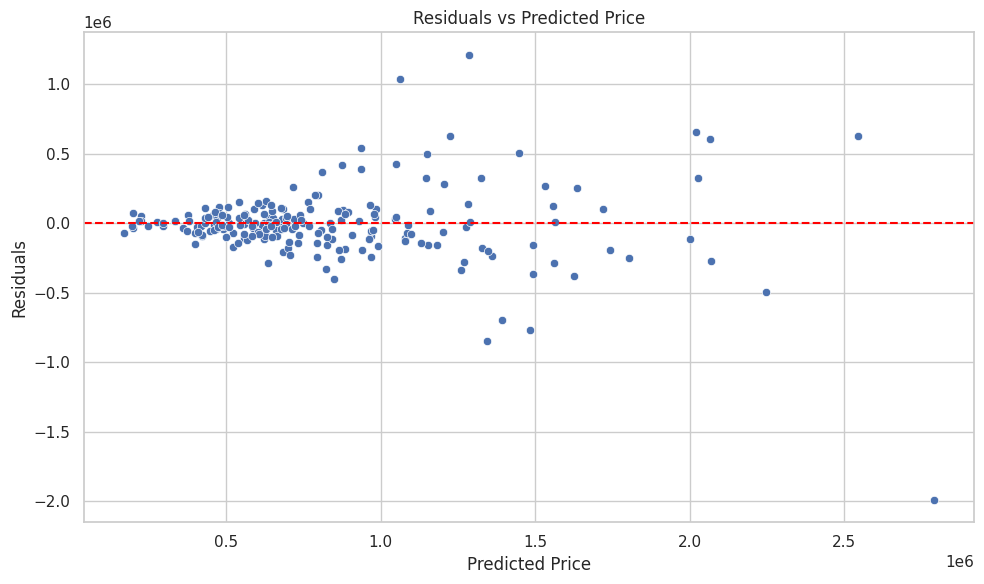

In [52]:
residuals = y_test - preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


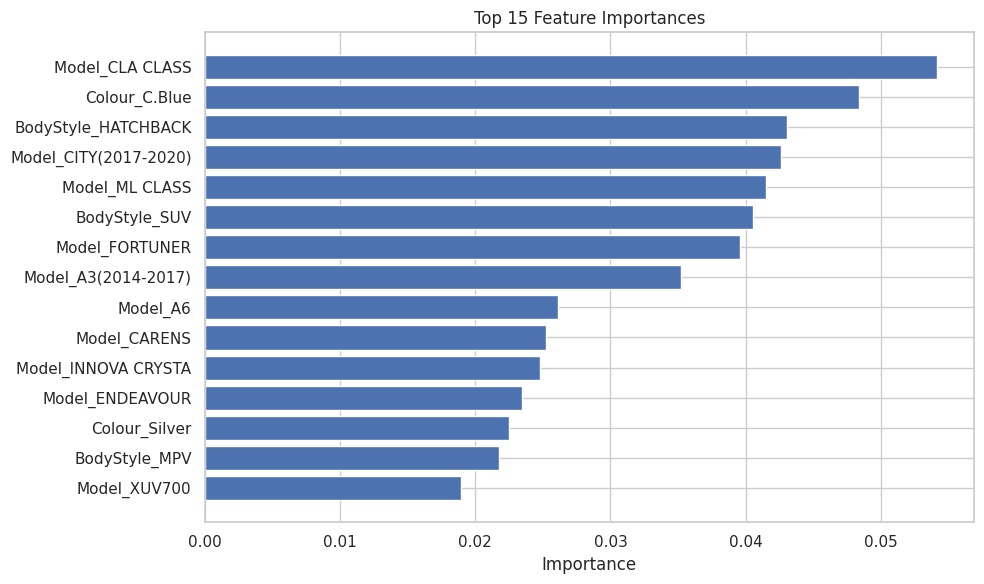

In [53]:
num_features = numerical_cols

# Get one-hot encoded category feature names
cat_encoder = final_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Combine both
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Step 2: Extract the XGBoost model
xgb_model = final_model.named_steps["xgb"]

# Step 3: Get feature importances with proper names
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [54]:
# Export feature importances to CSV
importance_df.to_csv("feature_importance.csv", index=False)


In [55]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": preds
})

results_df.to_csv("price_predictions.csv", index=False)


In [56]:
df.to_csv("Final_cleaned.csv")